# Data Exploration for: FD002

Here we will perform a Explorative Data An
alysis for the sub dataset FD002. 

## 0. Imports

In [ ]:
!python -m pip install statsmodels

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# 1. Read data

In [149]:
# Reading data 
train_data = pd.read_csv('./data/train_FD002.txt', delim_whitespace=True, header=None)
test_data = pd.read_csv('./data/test_FD002.txt', delim_whitespace=True, header=None)

As we can see, the data is not correctly formatted when reading it in.
Let's add column names and split the columns.

In [150]:
# Setting column names
columns_1 = ["UnitNumber", "Cycle"]

columns_2 = [f"Operation Setting {i}" for i in range(1,4)]
    
columns_3 = [f"Sensor Measure{i}" for i in range(1,22)]

columns = columns_1 + columns_2 + columns_3
columns

['UnitNumber',
 'Cycle',
 'Operation Setting 1',
 'Operation Setting 2',
 'Operation Setting 3',
 'Sensor Measure1',
 'Sensor Measure2',
 'Sensor Measure3',
 'Sensor Measure4',
 'Sensor Measure5',
 'Sensor Measure6',
 'Sensor Measure7',
 'Sensor Measure8',
 'Sensor Measure9',
 'Sensor Measure10',
 'Sensor Measure11',
 'Sensor Measure12',
 'Sensor Measure13',
 'Sensor Measure14',
 'Sensor Measure15',
 'Sensor Measure16',
 'Sensor Measure17',
 'Sensor Measure18',
 'Sensor Measure19',
 'Sensor Measure20',
 'Sensor Measure21']

In [151]:
# Assigning corresponding column names
train_data.columns = columns
test_data.columns = columns

# Transforming into floats
train_data 

UnitNumber  Cycle  Operation Setting 1  Operation Setting 2  \
0               1      1              34.9983               0.8400   
1               1      2              41.9982               0.8408   
2               1      3              24.9988               0.6218   
3               1      4              42.0077               0.8416   
4               1      5              25.0005               0.6203   
...           ...    ...                  ...                  ...   
53754         260    312              20.0037               0.7000   
53755         260    313              10.0022               0.2510   
53756         260    314              25.0041               0.6200   
53757         260    315              25.0033               0.6220   
53758         260    316              35.0036               0.8400   

       Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
0                    100.0           449.44           555.32          1358.61   
1                    100.0           445.00           549.90          1353.22   
2                     60.0           462.54           537.31          1256.76   
3                    100.0           445.00           549.51          1354.03   
4                     60.0           462.54           537.07          1257.71   
...                    ...              ...              ...              ...   
53754                100.0           491.19           608.79          1495.60   
53755                100.0           489.05           605.81          1514.32   
53756                 60.0           462.54           537.48          1276.24   
53757                 60.0           462.54           537.84          1272.95   
53758                100.0           449.44           556.64          1374.61   

       Sensor Measure4  Sensor Measure5  ...  Sensor Measure12  \
0              1137.23             5.48  ...            183.06   
1              1125.78             3.91  ...            130.42   
2              1047.45             7.05  ...            164.22   
3              1126.38             3.91  ...            130.72   
4              1047.93             7.05  ...            164.31   
...                ...              ...  ...               ...   
53754          1269.51             9.35  ...            314.05   
53755          1324.12            10.52  ...            371.22   
53756          1057.92             7.05  ...            163.74   
53757          1066.30             7.05  ...            164.37   
53758          1145.52             5.48  ...            183.09   

       Sensor Measure13  Sensor Measure14  Sensor Measure15  Sensor Measure16  \
0               2387.72           8048.56            9.3461              0.02   
1               2387.66           8072.30            9.3774              0.02   
2               2028.03           7864.87           10.8941              0.02   
3               2387.61           8068.66            9.3528              0.02   
4               2028.00           7861.23           10.8963              0.02   
...                 ...               ...               ...               ...   
53754           2389.02           8169.64            9.3035              0.03   
53755           2388.42           8245.36            8.7586              0.03   
53756           2030.33           7971.25           11.0657              0.02   
53757           2030.35           7972.47           11.0537              0.02   
53758           2390.38           8185.35            9.3998              0.02   

       Sensor Measure17  Sensor Measure18  Sensor Measure19  Sensor Measure20  \
0                   334              2223            100.00             14.73   
1                   330              2212            100.00             10.41   
2                   309              1915             84.93             14.08   
3                   329              2212            100.00             10.59   
4                   30

## 2. Statistics

In [152]:
# Printing number of rows and columns
print(f"Train set -> Number of rows: {train_data.shape[0]}, Number of columns: {train_data.shape[1]}")
print(f"Test set -> Number of rows: {test_data.shape[0]}, Number of columns: {test_data.shape[1]}")

Train set -> Number of rows: 53759, Number of columns: 26
Test set -> Number of rows: 33991, Number of columns: 26


In [155]:
print(train_data.info(), test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53759 entries, 0 to 53758
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UnitNumber           53759 non-null  int64  
 1   Cycle                53759 non-null  int64  
 2   Operation Setting 1  53759 non-null  float64
 3   Operation Setting 2  53759 non-null  float64
 4   Operation Setting 3  53759 non-null  float64
 5   Sensor Measure1      53759 non-null  float64
 6   Sensor Measure2      53759 non-null  float64
 7   Sensor Measure3      53759 non-null  float64
 8   Sensor Measure4      53759 non-null  float64
 9   Sensor Measure5      53759 non-null  float64
 10  Sensor Measure6      53759 non-null  float64
 11  Sensor Measure7      53759 non-null  float64
 12  Sensor Measure8      53759 non-null  float64
 13  Sensor Measure9      53759 non-null  float64
 14  Sensor Measure10     53759 non-null  float64
 15  Sensor Measure11     53759 non-null 

Let's check for missing values:

In [156]:
print(train_data.isnull().sum(), test_data.isnull().sum())

UnitNumber             0
Cycle                  0
Operation Setting 1    0
Operation Setting 2    0
Operation Setting 3    0
Sensor Measure1        0
Sensor Measure2        0
Sensor Measure3        0
Sensor Measure4        0
Sensor Measure5        0
Sensor Measure6        0
Sensor Measure7        0
Sensor Measure8        0
Sensor Measure9        0
Sensor Measure10       0
Sensor Measure11       0
Sensor Measure12       0
Sensor Measure13       0
Sensor Measure14       0
Sensor Measure15       0
Sensor Measure16       0
Sensor Measure17       0
Sensor Measure18       0
Sensor Measure19       0
Sensor Measure20       0
Sensor Measure21       0
dtype: int64 UnitNumber             0
Cycle                  0
Operation Setting 1    0
Operation Setting 2    0
Operation Setting 3    0
Sensor Measure1        0
Sensor Measure2        0
Sensor Measure3        0
Sensor Measure4        0
Sensor Measure5        0
Sensor Measure6        0
Sensor Measure7        0
Sensor Measure8        0
Sensor Measu

-> We don't have any missing values, great!

In [157]:
# Statistical overview
train_data.describe()

UnitNumber         Cycle  Operation Setting 1  Operation Setting 2  \
count  53759.000000  53759.000000         53759.000000         53759.000000   
mean     131.082981    109.154746            23.998407             0.572056   
std       74.463862     69.180569            14.747376             0.310016   
min        1.000000      1.000000             0.000000             0.000000   
25%       68.000000     52.000000            10.004600             0.250700   
50%      131.000000    104.000000            25.001300             0.700000   
75%      195.000000    157.000000            41.998000             0.840000   
max      260.000000    378.000000            42.008000             0.842000   

       Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
count         53759.000000     53759.000000     53759.000000     53759.000000   
mean             94.046020       472.910207       579.672399      1419.971013   
std              14.237735        26.389707        37.289399       105.946341   
min              60.000000       445.000000       535.530000      1243.730000   
25%             100.000000       445.000000       549.570000      1352.760000   
50%             100.000000       462.540000       555.980000      1369.180000   
75%             100.000000       491.190000       607.340000      1499.370000   
max             100.000000       518.670000       644.520000      1612.880000   

       Sensor Measure4  Sensor Measure5  ...  Sensor Measure12  \
count     53759.000000     53759.000000  ...      53759.000000   
mean       1205.442024         8.031986  ...        266.069034   
std         119.123428         3.613839  ...        137.659507   
min        1023.770000         3.910000  ...        129.120000   
25%        1123.655000         3.910000  ...        131.520000   
50%        1138.890000         7.050000  ...        183.200000   
75%        1306.850000        10.520000  ...        371.260000   
max        1439.230000        14.620000  ...        523.370000   

       Sensor Measure13  Sensor Measure14  Sensor Measure15  Sensor Measure16  \
count      53759.000000      53759.000000      53759.000000      53759.000000   
mean        2334.557253       8066.597682          9.329654          0.023326   
std          128.068271         84.837950          0.749335          0.004711   
min         2027.610000       7848.360000          8.335700          0.020000   
25%         2387.900000       8062.140000          8.677800          0.020000   
50%         2388.080000       8082.540000          9.310900          0.020000   
75%         2388.170000       8127.195000          9.386900          0.030000   
max         2390.480000       8268.500000         11.066900          0.030000   

       Sensor Measure17  Sensor Measure18  Sensor Measure19  Sensor Measure20  \
count      53759.000000      53759.000000      53759.000000      53759.000000   
mean         348.309511       2228.806358         97.756838         20.789296   
std           27.754515        145.327980          5.364067          9.869331   
min          303.000000       1915.000000         84.930000         10.180000   
25%          331.000000       2212.000000        100.000000         10.910000   
50%          335.000000       2223.000000        100.000000         14.880000   
75%          369.000000       2324.000000        100.000000         28.470000   
max          399.000000       2388.000000        100.000000         39.340000   

       Sensor Measure21  
count      53759.000000  
mean          12.473423  
std            5.921615  
min            6.010500  
25%            6.546300  
50%            8.929200  
75%           17.083200  
max           23.590100  

[8 rows x 26 columns]

In the following, we will plot the number of engines we have in each data set. 

In [167]:
unit = train_data["UnitNumber"].unique()
print("In den Trainingsdaten sind {} Turbofan-Motor enthalten.".format(len(unit)))

unit = test_data["UnitNumber"].unique()
print("In den Testdaten sind {} Turbofan-Motor enthalten.".format(len(unit)))

In den Trainingsdaten sind 260 Turbofan-Motor enthalten.
In den Testdaten sind 259 Turbofan-Motor enthalten.


Let's now see how often each number of cycles is represented in our datasets.

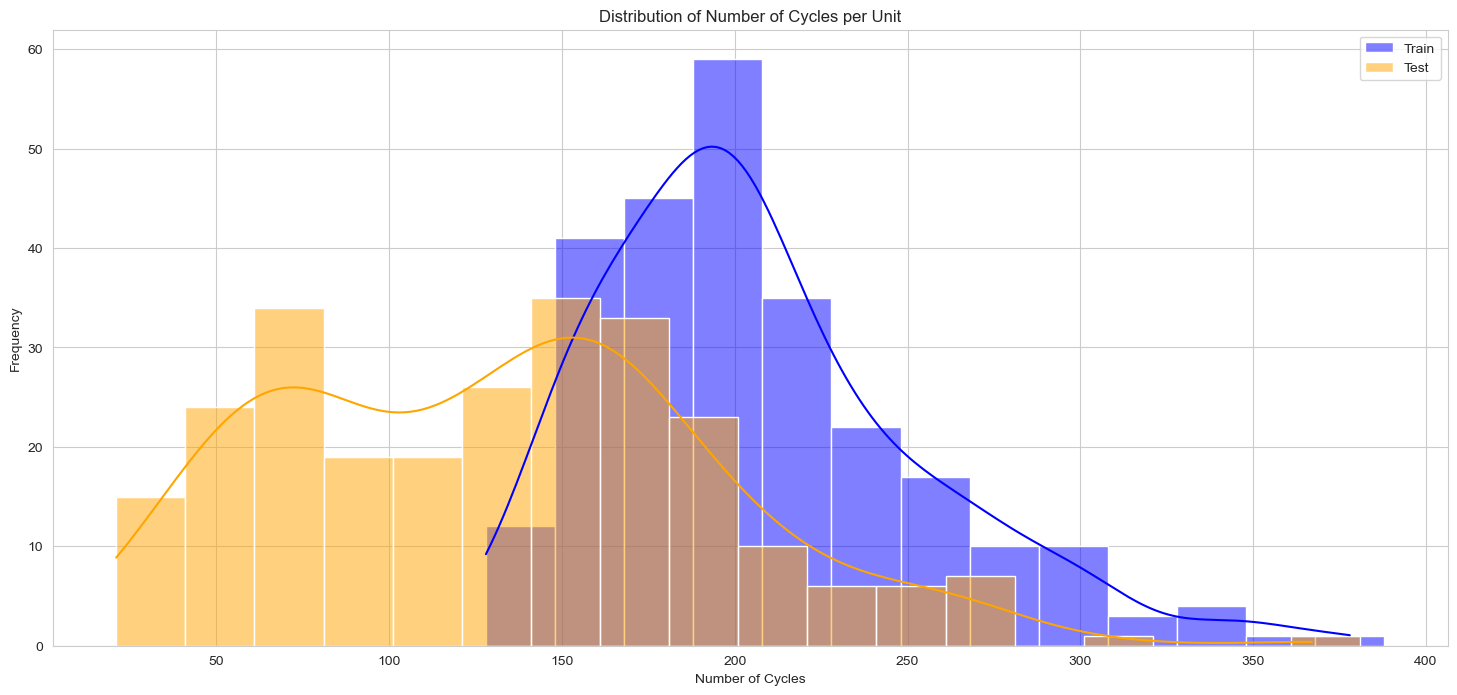

In [214]:
sns.histplot(data=train_data.groupby('UnitNumber')['Cycle'].max(), binwidth=20, kde=True, color='blue', label='Train')
sns.histplot(data=test_data.groupby('UnitNumber')['Cycle'].max(), binwidth=20, kde=True, color='orange', label='Test')

# Setting title and axes
plt.title('Distribution of Number of Cycles per Unit')
plt.xlabel("Number of Cycles")  
plt.ylabel("Frequency")             

plt.legend()

plt.show()

It appears that the test set has a bimodal distribution whereas the train set is unimodal.

## Correlation

Now, let's have a look on the correlation map for the individual features.

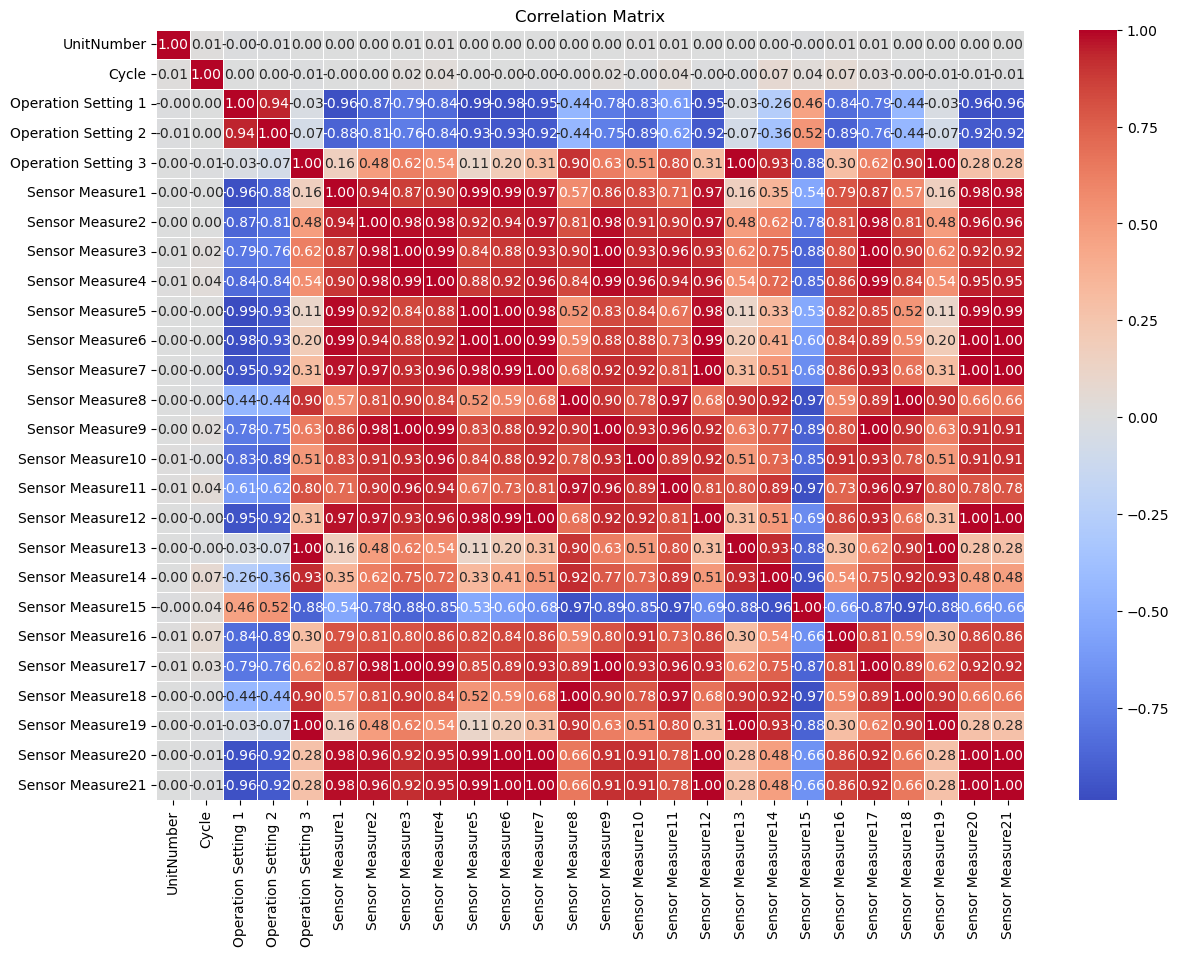

In [134]:
# Correlation heatmap
plt.figure(figsize=(14, 10))
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [216]:
# Calculate the correlation matrix
correlation_matrix = train_data.corr()

# Convert the correlation matrix to absolute values
abs_correlation_matrix = correlation_matrix.abs()

# Unstack the correlation matrix and sort by absolute value
sorted_correlation = abs_correlation_matrix.unstack().sort_values(ascending=False)

# Drop duplicate pairs
sorted_correlation = sorted_correlation[sorted_correlation.index.get_level_values(0) != sorted_correlation.index.get_level_values(1)]

# Drop the duplicate rows by keeping the first occurrence
sorted_correlation = sorted_correlation[~sorted_correlation.index.duplicated(keep='first')]

sorted_correlation

sorted_correlation_df = sorted_correlation.reset_index()
sorted_correlation_df.columns = ['Feature1', 'Feature2', 'Correlation']

sorted_correlation_df

Feature1             Feature2  Correlation
0    Operation Setting 3     Sensor Measure19     1.000000
1       Sensor Measure19  Operation Setting 3     1.000000
2       Sensor Measure18      Sensor Measure8     0.999999
3        Sensor Measure8     Sensor Measure18     0.999999
4       Sensor Measure13  Operation Setting 3     0.999998
..                   ...                  ...          ...
697  Operation Setting 2                  RUL     0.000047
698  Operation Setting 1                Cycle     0.000039
699                Cycle  Operation Setting 1     0.000039
700                  RUL      Sensor Measure1     0.000023
701      Sensor Measure1                  RUL     0.000023

[702 rows x 3 columns]

In [217]:
# Plot correlations as a table
sorted_correlation_df = sorted_correlation_df.iloc[::2].reset_index(drop=True)
# Filter the DataFrame to include only rows where the absolute value of the correlation is greater than 0.99
sorted_correlation_df = sorted_correlation_df[sorted_correlation_df['Correlation'] > 0.99]

sorted_correlation_df

Feature1             Feature2  Correlation
0   Operation Setting 3     Sensor Measure19     1.000000
1      Sensor Measure18      Sensor Measure8     0.999999
2      Sensor Measure13  Operation Setting 3     0.999998
3      Sensor Measure13     Sensor Measure19     0.999998
4      Sensor Measure12      Sensor Measure7     0.999993
5      Sensor Measure21     Sensor Measure20     0.999898
6      Sensor Measure20      Sensor Measure7     0.999146
7      Sensor Measure21      Sensor Measure7     0.999145
8      Sensor Measure20     Sensor Measure12     0.999087
9      Sensor Measure21     Sensor Measure12     0.999086
10      Sensor Measure3     Sensor Measure17     0.998680
11     Sensor Measure17      Sensor Measure9     0.997853
12      Sensor Measure3      Sensor Measure9     0.997806
13     Sensor Measure21      Sensor Measure6     0.996363
14     Sensor Measure20      Sensor Measure6     0.996356
15      Sensor Measure5      Sensor Measure6     0.996311
16      Sensor Measure6      Sensor Measure7     0.993270
17     Sensor Measure12      Sensor Measure6     0.993096
18      Sensor Measure4     Sensor Measure17     0.990213

We can see that we have a lot of highly correlated features in our dataset. 

In [136]:
motor_id = 1
Dataframe_id = train_data[train_data["UnitNumber"]==motor_id]
print("Turbofan mit ID {} lief insgesamt {} Zyklen".format(motor_id, Dataframe_id.shape[0]))

Turbofan mit ID 1 lief insgesamt 148 Zyklen


In [137]:
motor_id = 2
Dataframe_id = train_data[train_data["UnitNumber"]==motor_id]
print("Turbofan mit ID {} lief insgesamt {} Zyklen".format(motor_id, Dataframe_id.shape[0]))

Turbofan mit ID 2 lief insgesamt 269 Zyklen


In [138]:
motor_id = 100
Dataframe_id = train_data[train_data["UnitNumber"]==motor_id]
Dataframe_id

UnitNumber  Cycle  Operation Setting 1  Operation Setting 2  \
19997       100.0    1.0               0.0024               0.0014   
19998       100.0    2.0              10.0022               0.2518   
19999       100.0    3.0               0.0001               0.0000   
20000       100.0    4.0               0.0017               0.0017   
20001       100.0    5.0               0.0023               0.0000   
...           ...    ...                  ...                  ...   
20204       100.0  208.0              41.9999               0.8418   
20205       100.0  209.0              42.0026               0.8416   
20206       100.0  210.0              35.0029               0.8400   
20207       100.0  211.0              35.0055               0.8400   
20208       100.0  212.0              42.0066               0.8410   

       Operation Setting 3  Sensor Measure1  Sensor Measure2  Sensor Measure3  \
19997                100.0           518.67           642.85          1593.43   
19998                100.0           489.05           604.91          1496.73   
19999                100.0           518.67           641.91          1592.44   
20000                100.0           518.67           642.11          1587.74   
20001                100.0           518.67           642.20          1586.80   
...                    ...              ...              ...              ...   
20204                100.0           445.00           550.59          1365.59   
20205                100.0           445.00           550.54          1365.38   
20206                100.0           449.44           556.85          1374.10   
20207                100.0           449.44           556.49          1380.26   
20208                100.0           445.00           550.39          1371.41   

       Sensor Measure4  Sensor Measure5  ...  Sensor Measure12  \
19997          1395.24            14.62  ...            522.13   
19998          1301.57            10.52  ...            371.99   
19999          1395.57            14.62  ...            522.28   
20000          1405.77            14.62  ...            522.35   
20001          1404.11            14.62  ...            522.67   
...                ...              ...  ...               ...   
20204          1140.34             3.91  ...            130.10   
20205          1136.76             3.91  ...            130.07   
20206          1148.17             5.48  ...            182.85   
20207          1151.67             5.48  ...            182.98   
20208          1147.87             3.91  ...            130.09   

       Sensor Measure13  Sensor Measure14  Sensor Measure15  Sensor Measure16  \
19997           2388.01           8146.28            8.3972              0.03   
19998           2388.07           8134.91            8.6337              0.03   
19999           2388.03           8153.37            8.4231              0.03   
20000           2388.00           8147.20            8.4156              0.03   
20001           2388.07           8145.00            8.4240              0.03   
...                 ...               ...               ...               ...   
20204           2388.25           8100.95            9.4295              0.02   
20205           2388.33           8107.96            9.4230              0.02   
20206           2388.42           8090.64            9.4412              0.02   
20207           2388.49           8085.25            9.4136              0.02   
20208           2388.19           8102.31            9.4196              0.02   

       Sensor Measure17  Sensor Measure18  Sensor Measure19  Sensor Measure20  \
19997             391.0            2388.0             100.0             39.04   
19998             369.0            2319.0             100.0             28.55   
19999             391.0            2388.0             100.0             38.95   
20000             392.0            2388.0             100.0             39.00   
20001             393.

## RUL Berechnung

In [207]:
def add_remaining_useful_life(df):
    # Get the total number of cycles for each unit
    grouped_by_unit = df.groupby(by="UnitNumber")
    max_cycle = grouped_by_unit["Cycle"].max()
    result_frame = df.merge(max_cycle.to_frame(name='max_cycle'), left_on='UnitNumber', right_index=True)
    remaining_useful_life = result_frame["max_cycle"] - result_frame["Cycle"]
    result_frame["RUL"] = remaining_useful_life
    result_frame.drop("max_cycle", axis=1, inplace=True)
    return result_frame

train_data = add_remaining_useful_life(train_data) #Only for train data. Test data we dont have max_cycle

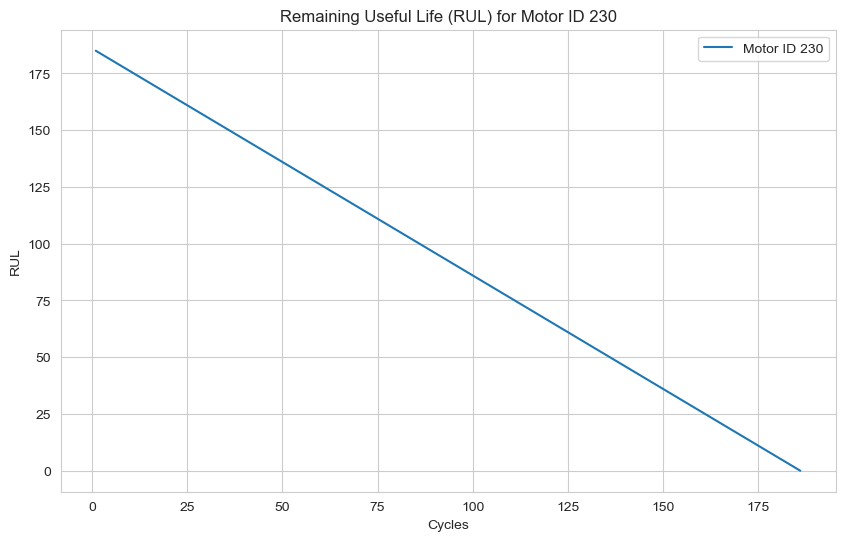

In [208]:
# Example motor ID
motor_id = 230
motor_data = train_data[train_data["UnitNumber"] == motor_id]

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plot the RUL with "cycles" on the x-axis using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=motor_data, x="Cycle", y="RUL", label=f'Motor ID {motor_id}')
plt.title(f'Remaining Useful Life (RUL) for Motor ID {motor_id}')
plt.xlabel('Cycles')
plt.ylabel('RUL')
plt.legend()
plt.show()

## Analyze time series of features

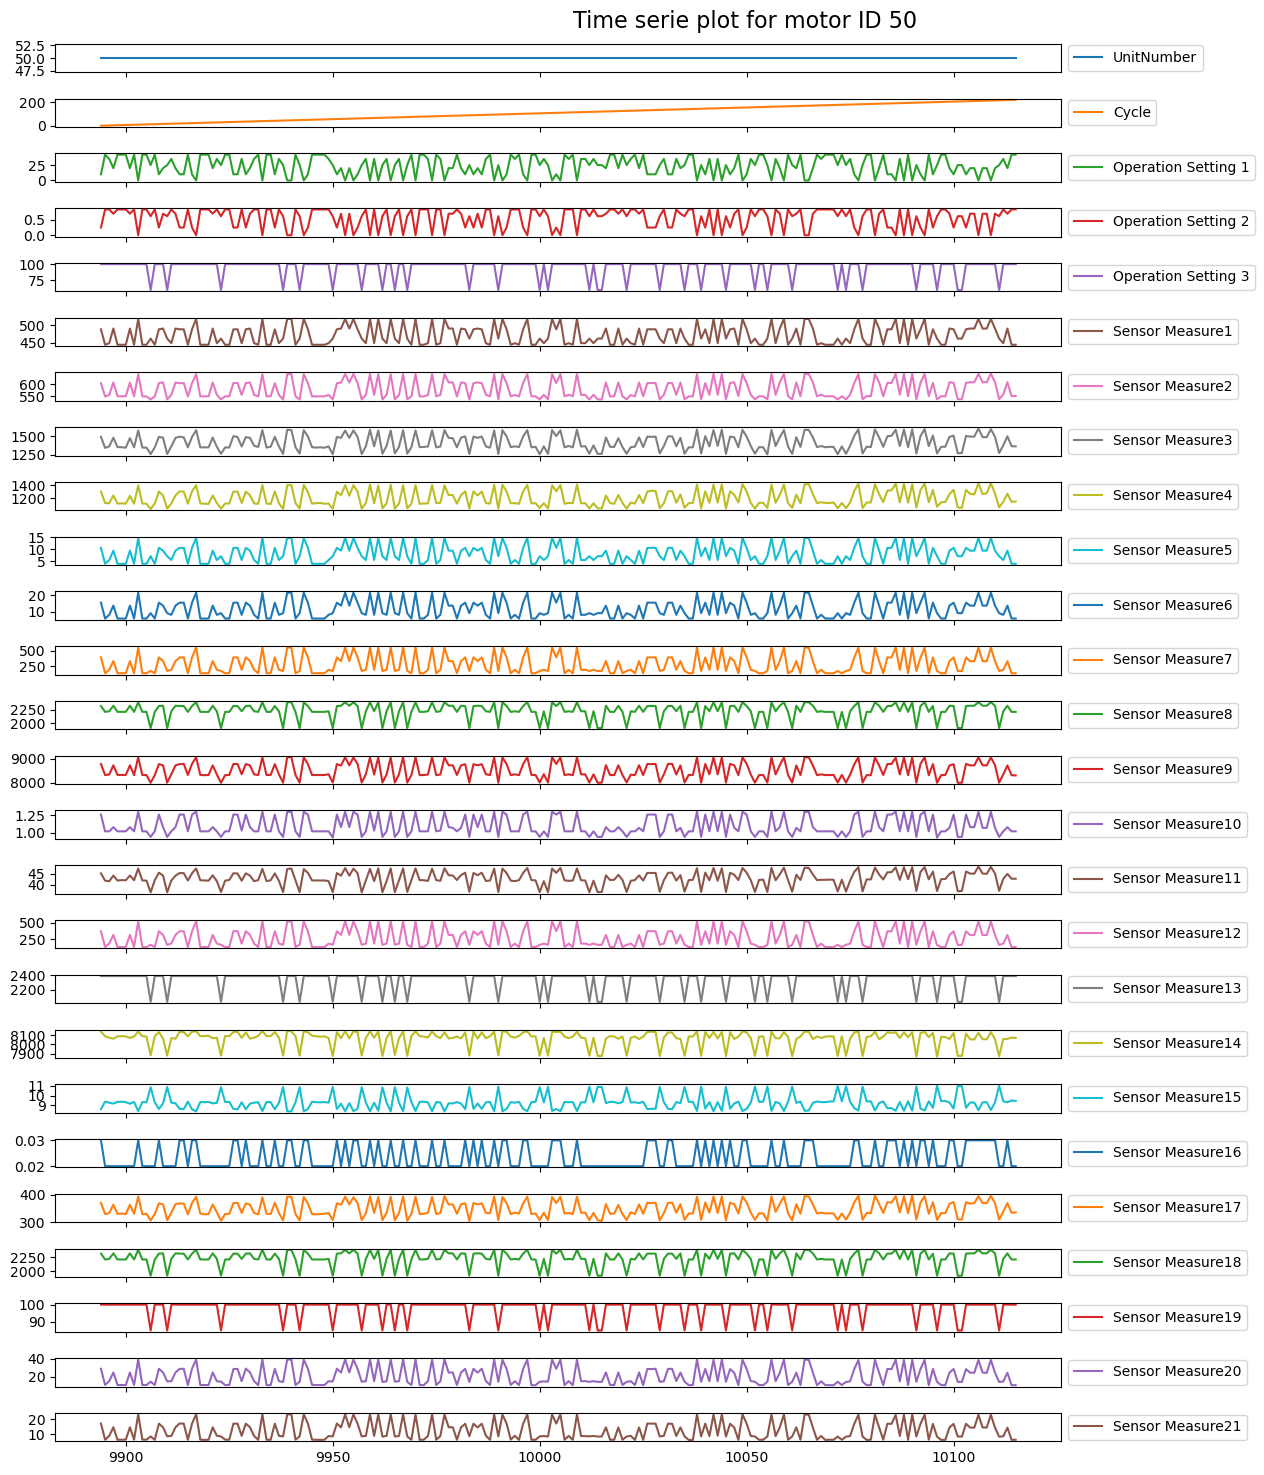

In [203]:
# Plot all sensor data of one motor
motor_id = 50

axes = train_data[train_data['UnitNumber']==motor_id].plot(subplots=True, figsize=(15, 15))
for ax in axes:
    # Set the legend to be outside the plot on the right
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout(rect=[0, 0, 0.85, 0.97])  # Make room on the right for the legends
plt.suptitle(f'Time serie plot for motor ID {motor_id}', fontsize=16)
plt.show()

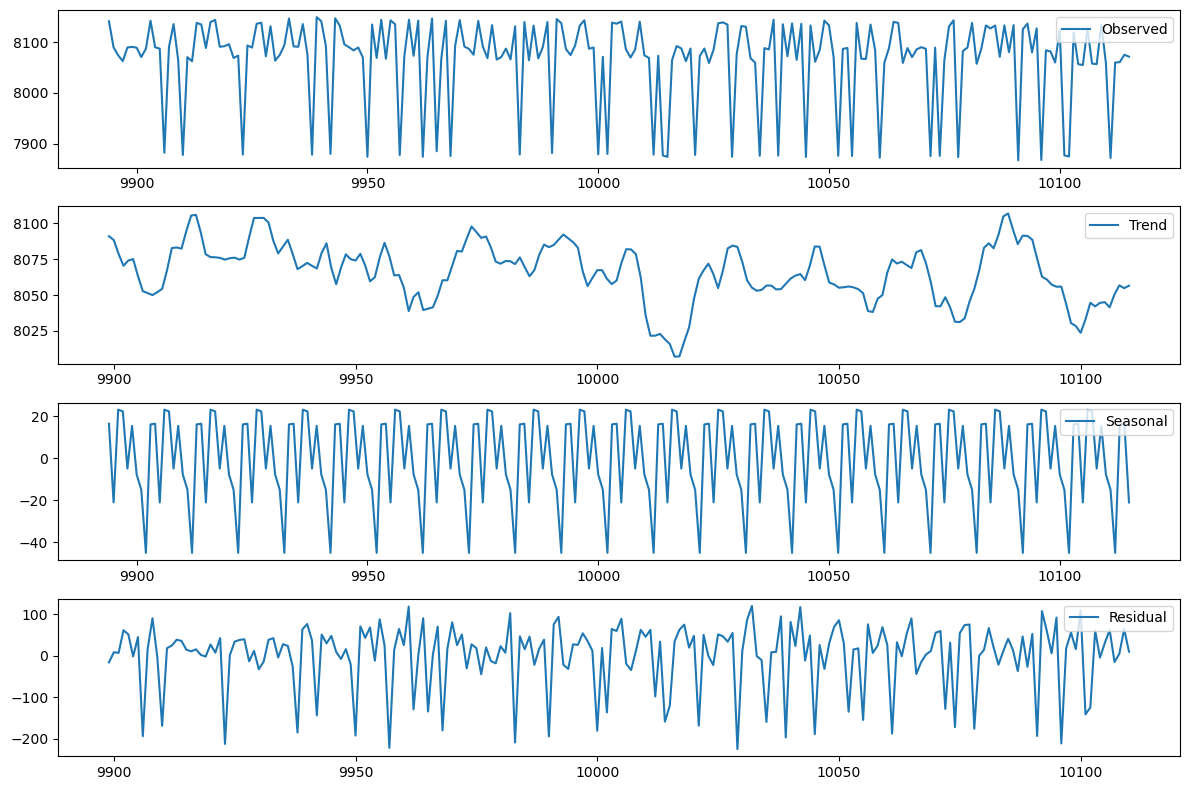

In [204]:
feature = 'Sensor Measure14' #Choose feature to see
motor_id = 50
ts = train_data[train_data['UnitNumber'] == motor_id][feature]

decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=10)
# Plot the decomposition components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(ts, label='Observed')
plt.legend(loc='upper right')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper right')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper right')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

There is now clear trend visible in terms of divergence at a specific point.

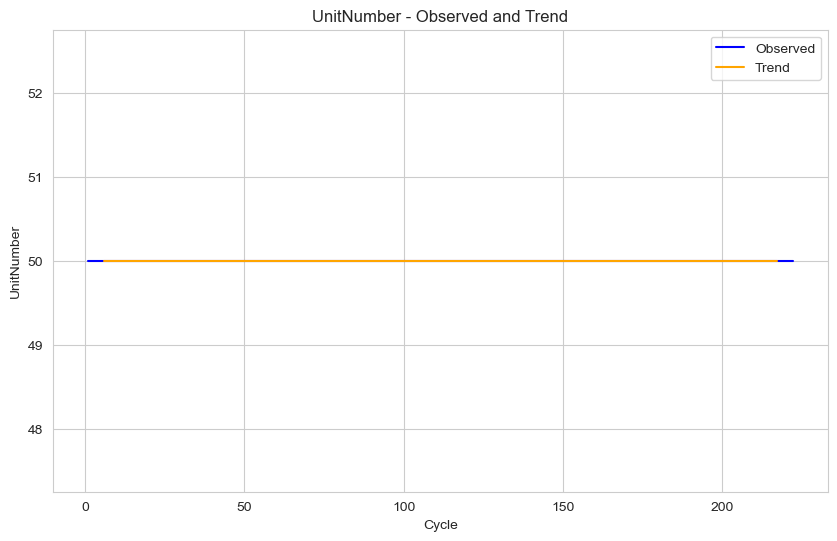

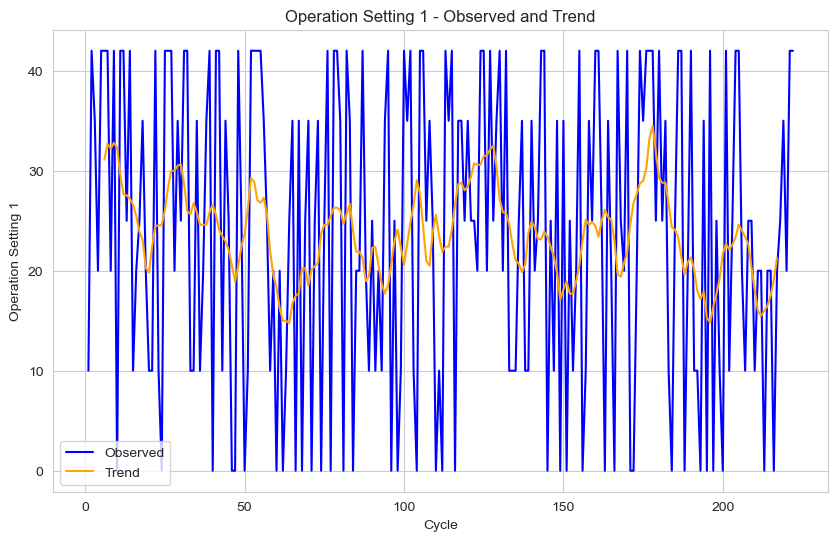

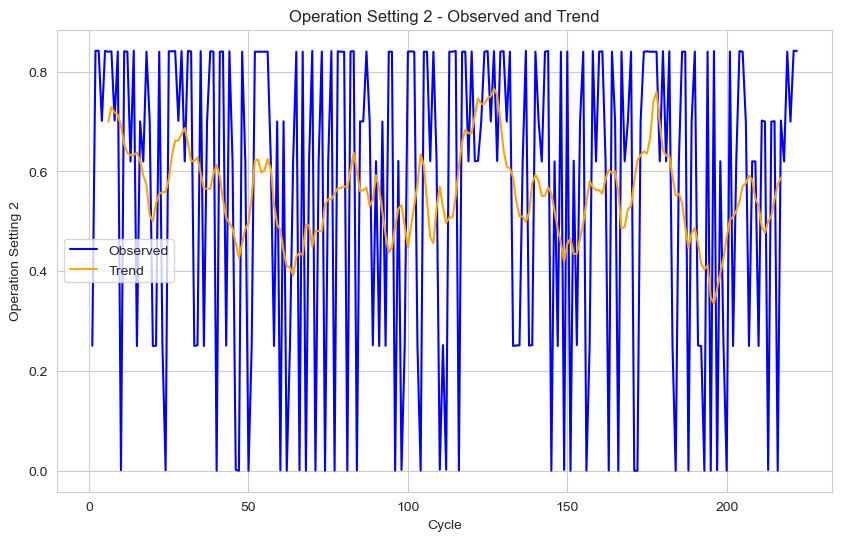

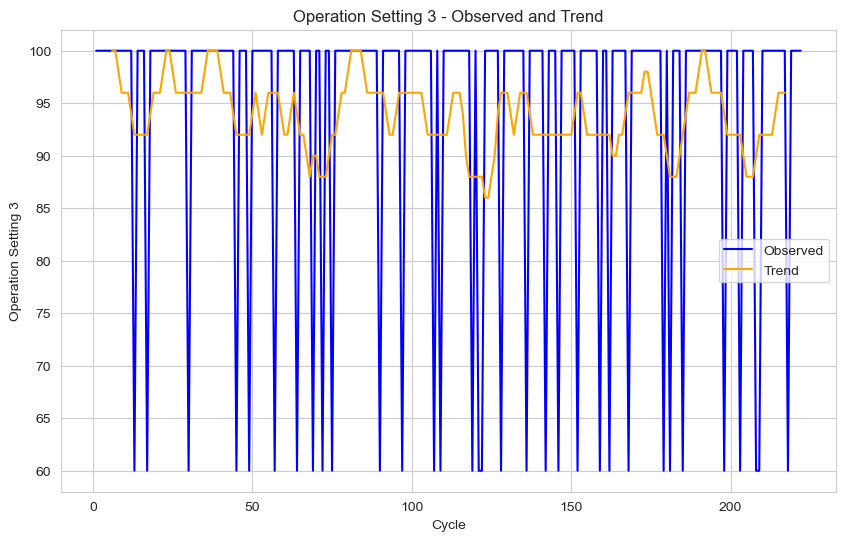

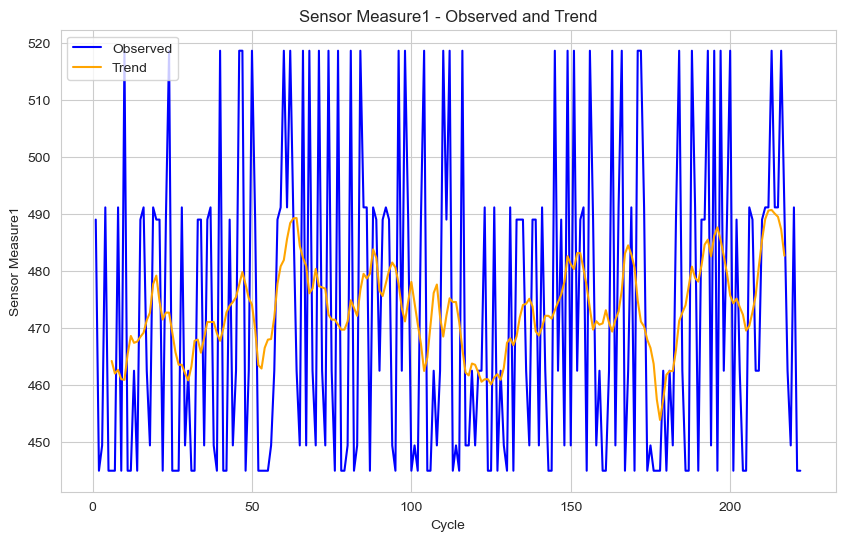

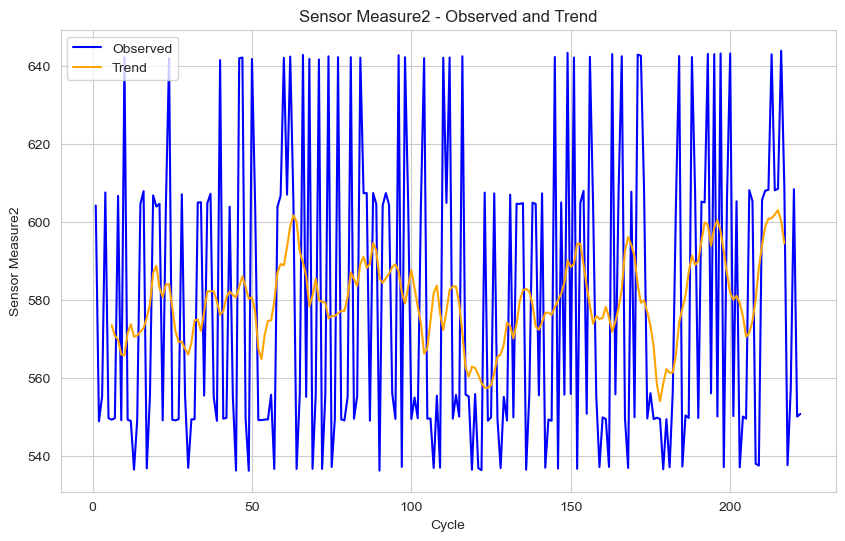

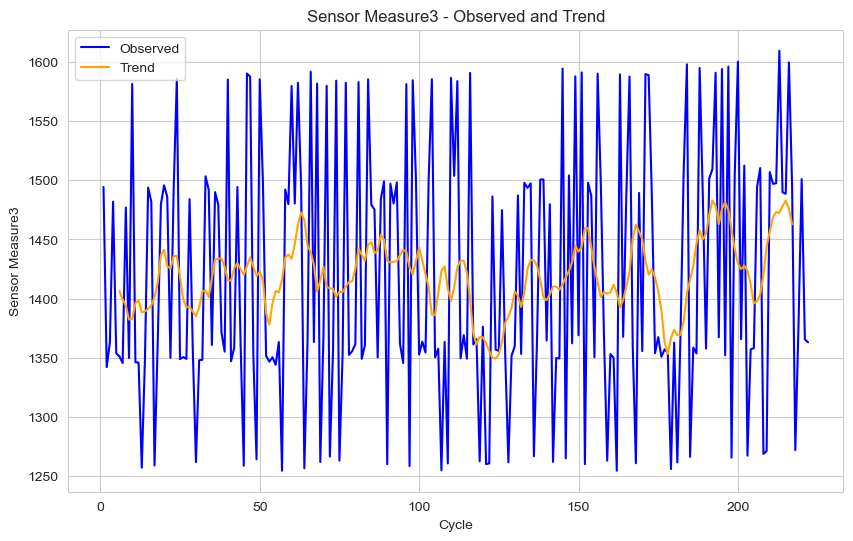

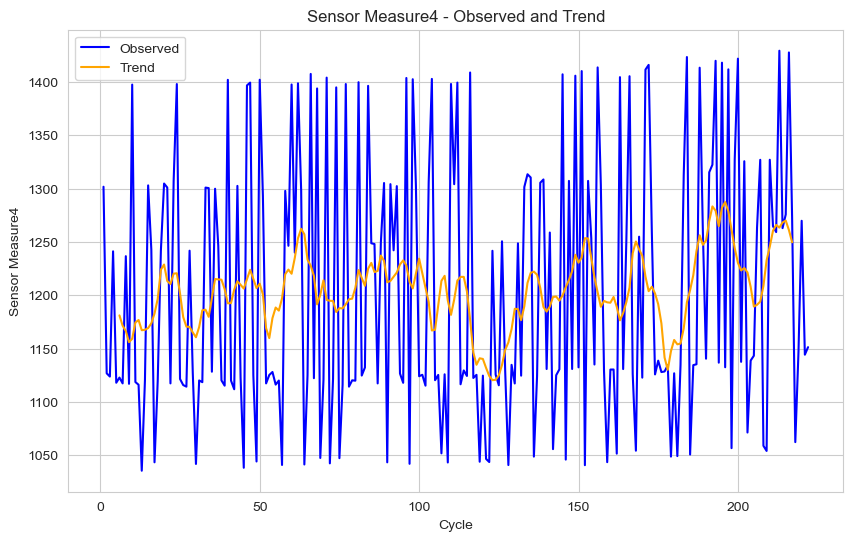

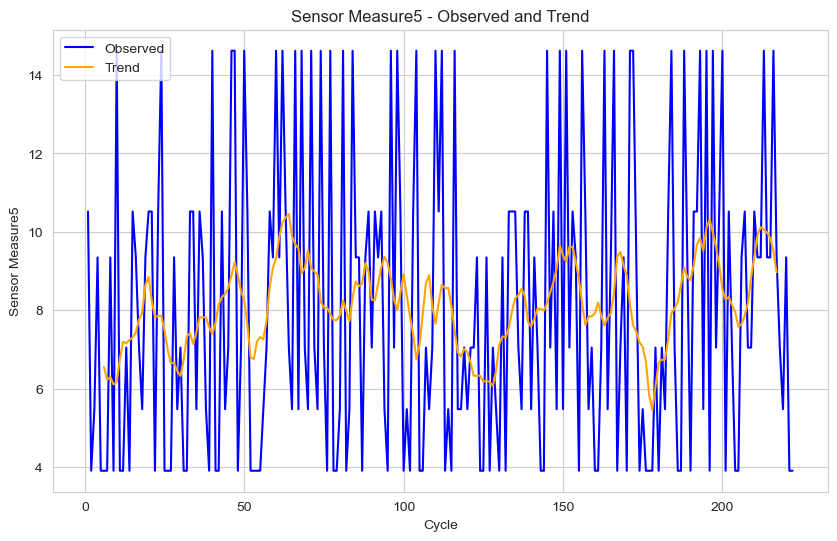

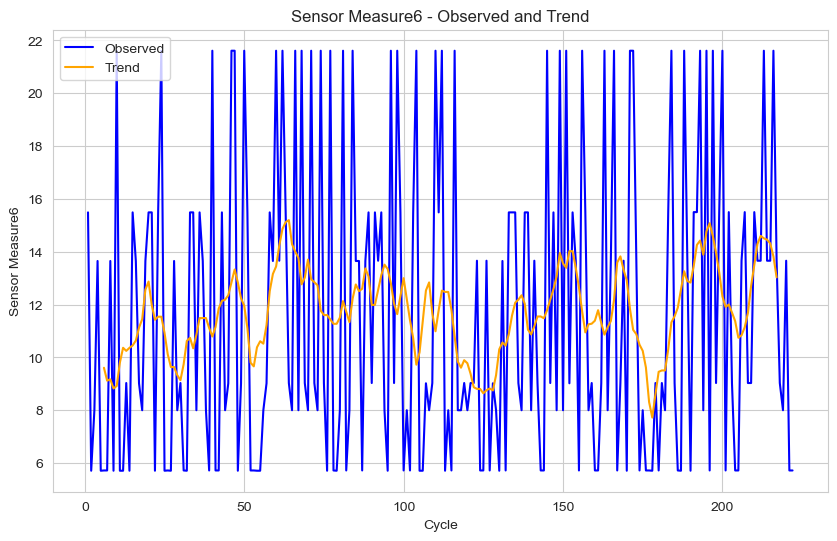

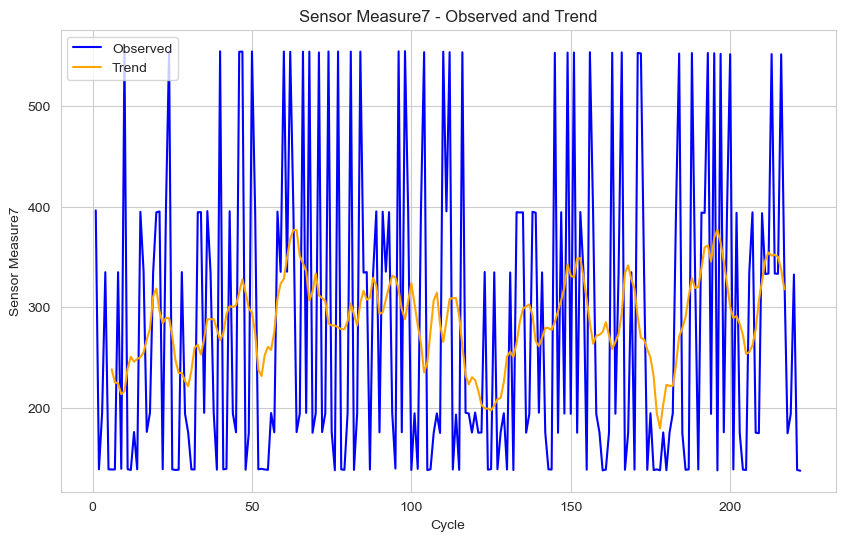

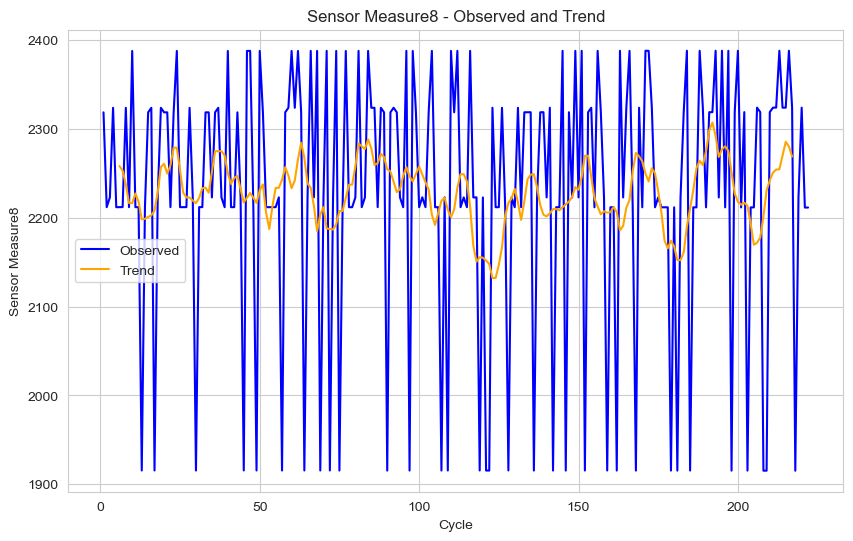

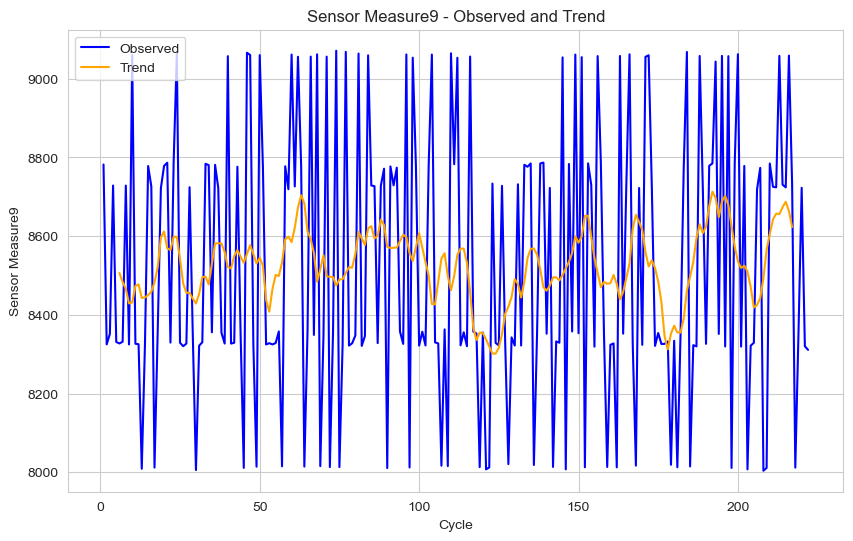

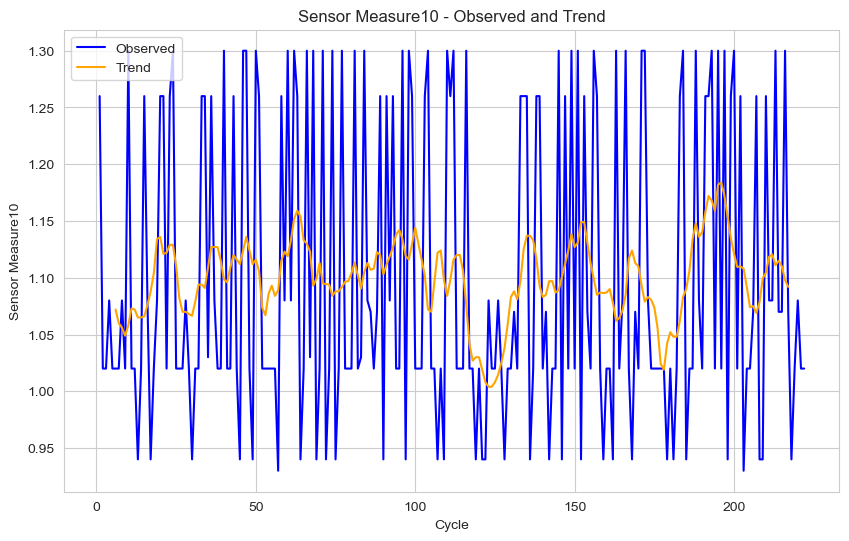

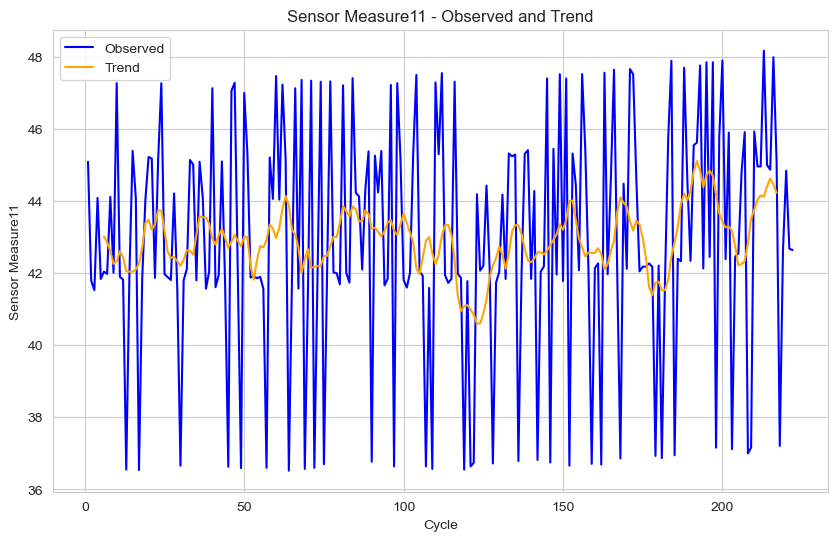

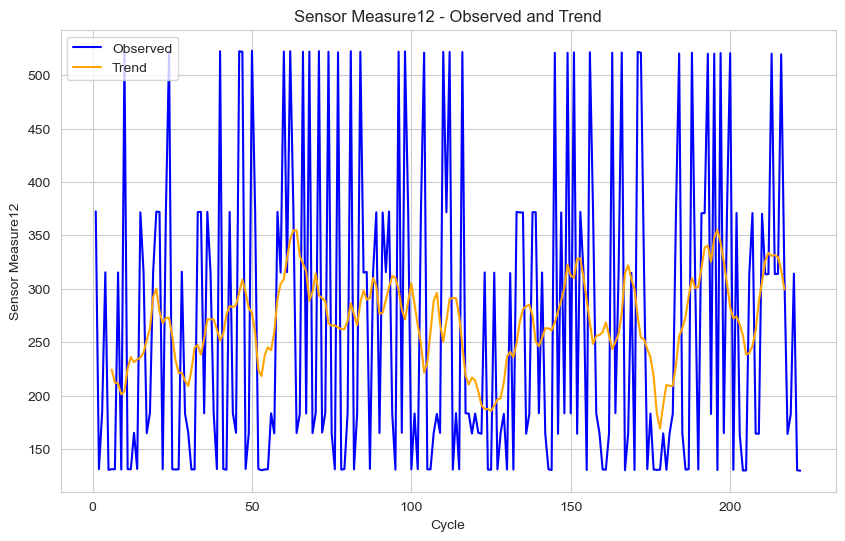

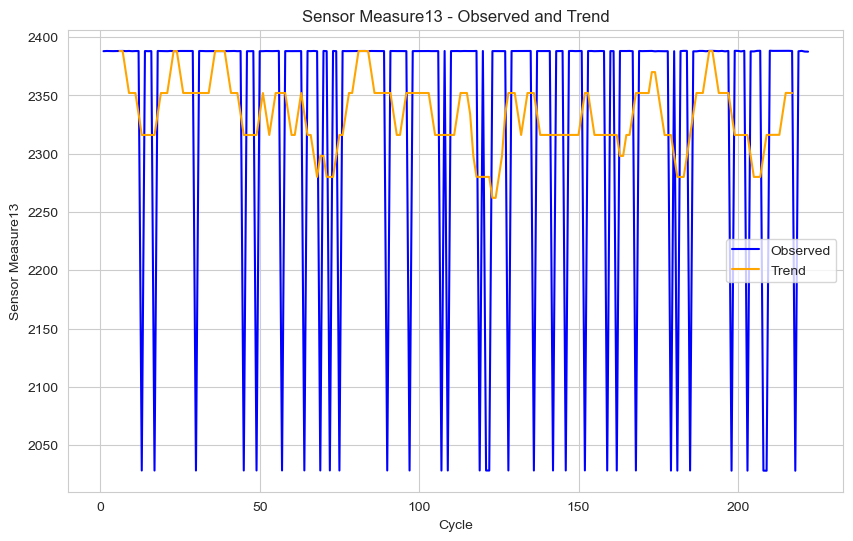

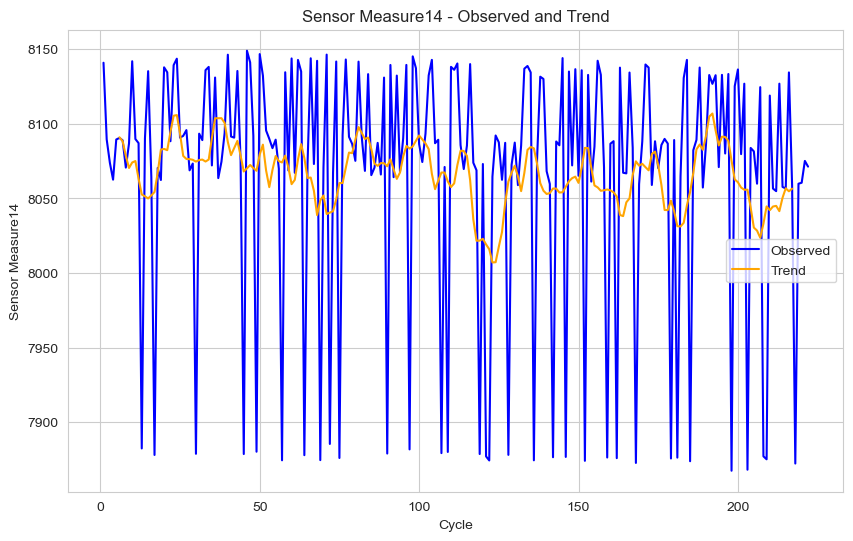

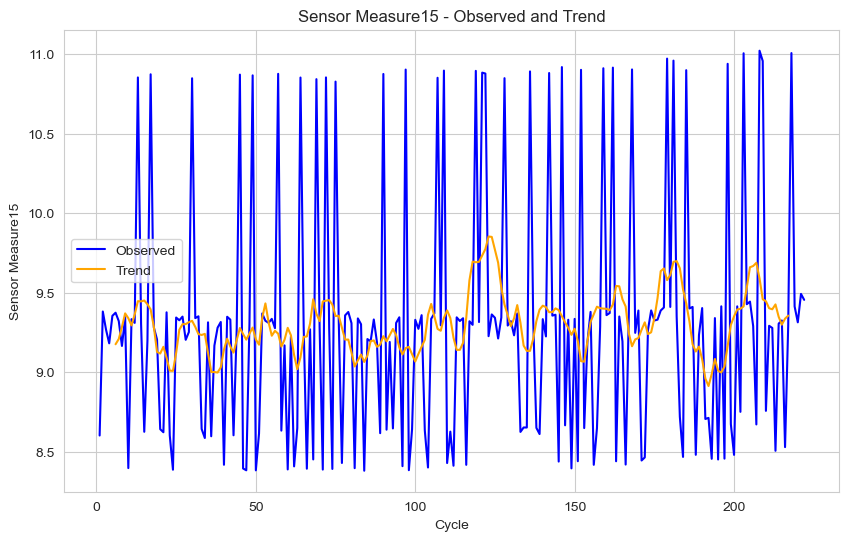

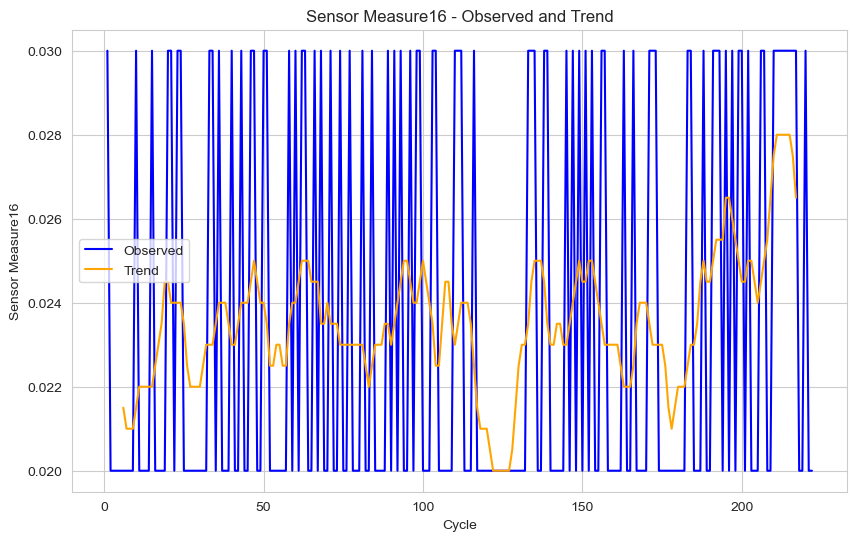

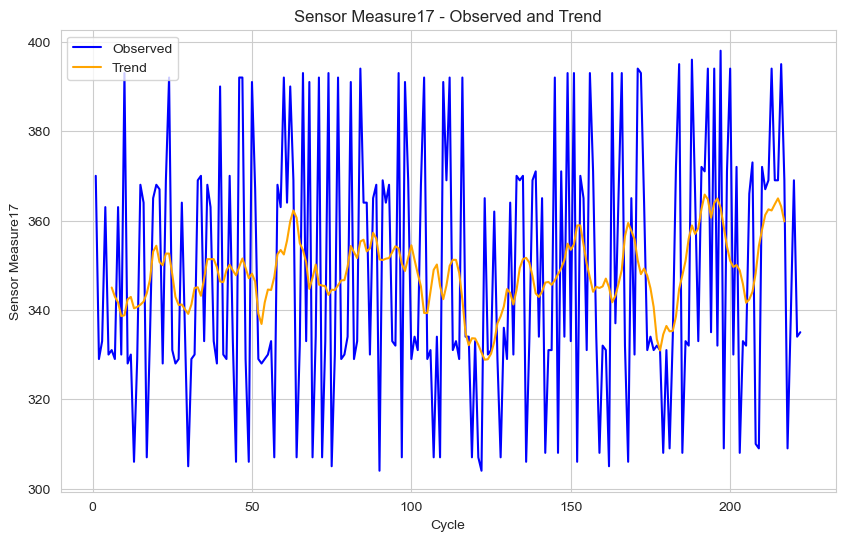

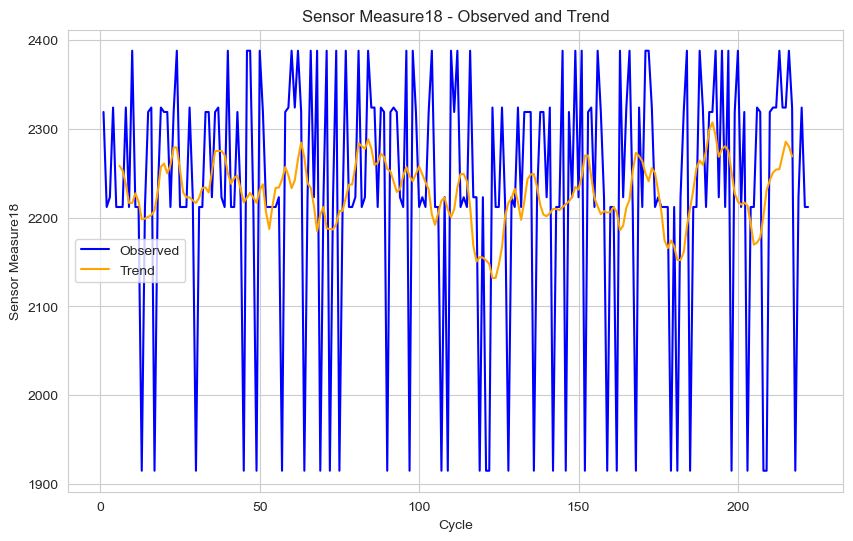

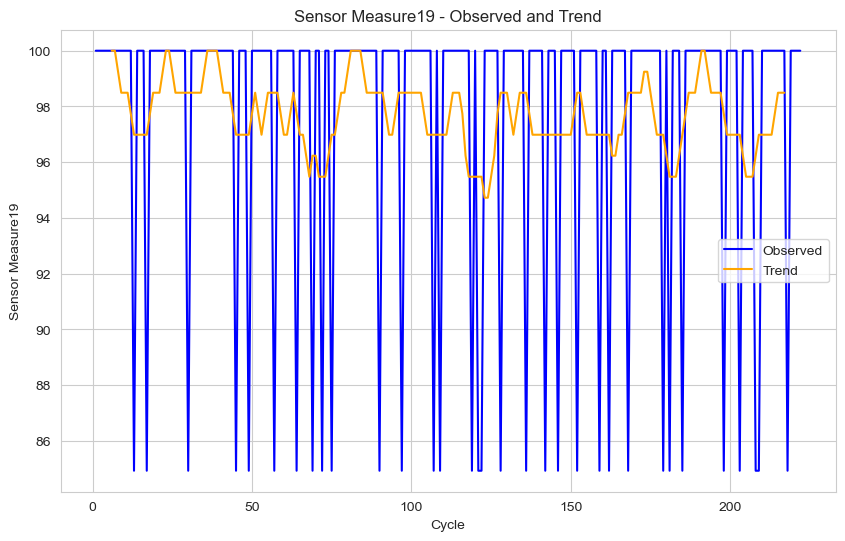

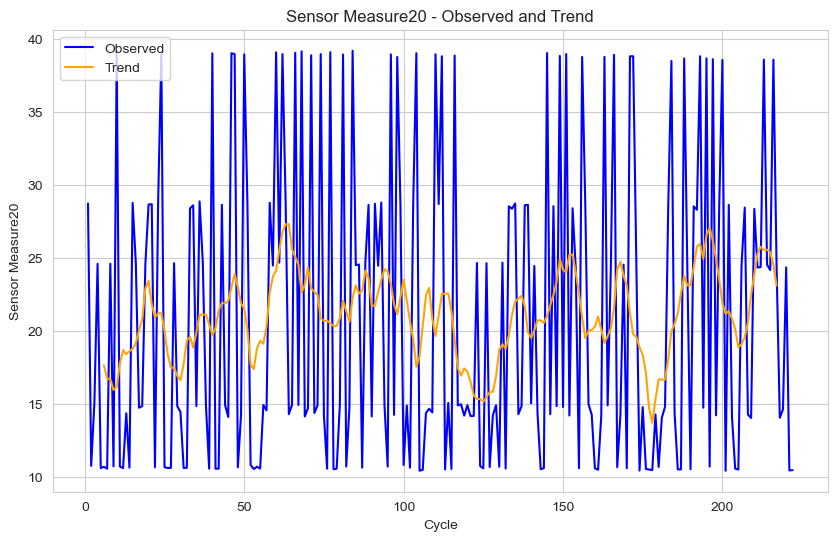

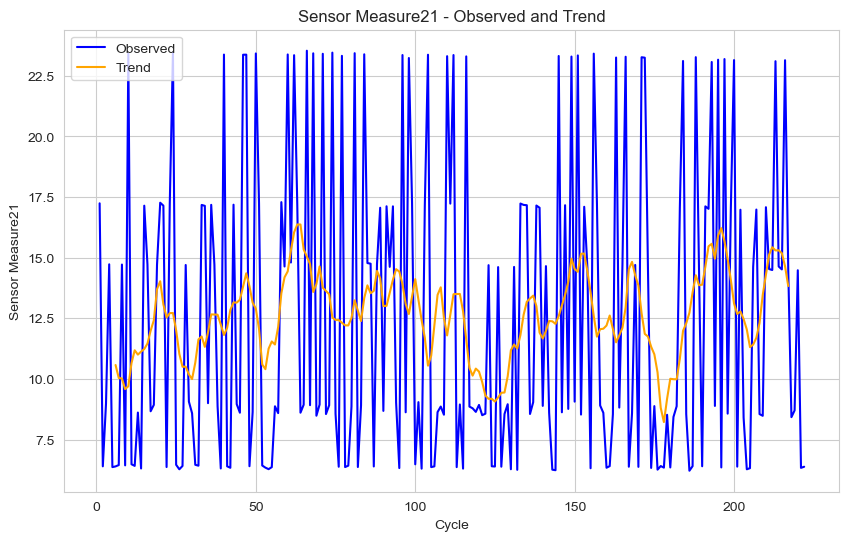

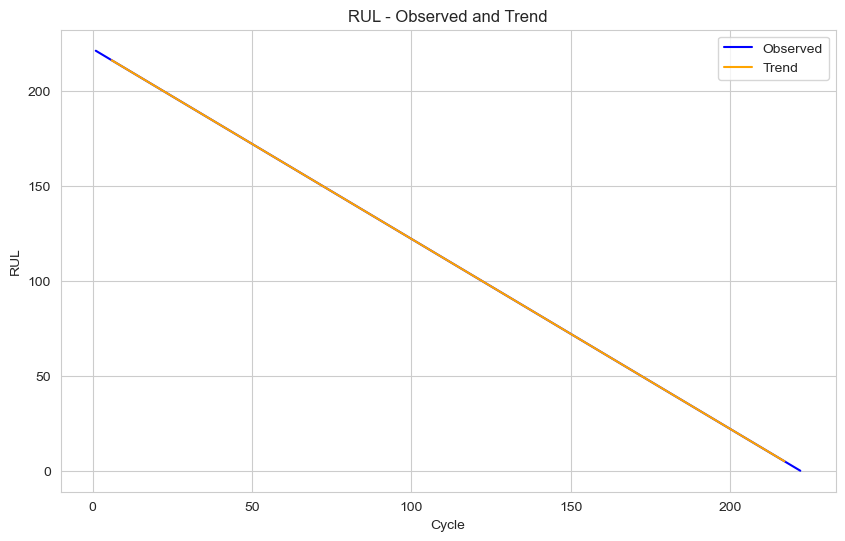

In [210]:
motor_id = 50
unit_data = train_data[train_data['UnitNumber'] == motor_id].set_index('Cycle')
period = 10  # Adjust the period as needed

# Plot observed and trend data for each sensor column
for feature in unit_data.columns:
    ts = unit_data[feature]

    # Perform seasonal decomposition
    decomposition = sm.tsa.seasonal_decompose(ts, model='additive', period=period)

    # Plot the observed and trend components
    plt.figure(figsize=(10, 6))
    plt.plot(ts, label='Observed', color='blue')
    plt.plot(decomposition.trend, label='Trend', color='orange')
    plt.xlabel('Cycle')
    plt.ylabel(feature)
    plt.title(f'{feature} - Observed and Trend')
    plt.legend()
    plt.grid(True)
    plt.show()

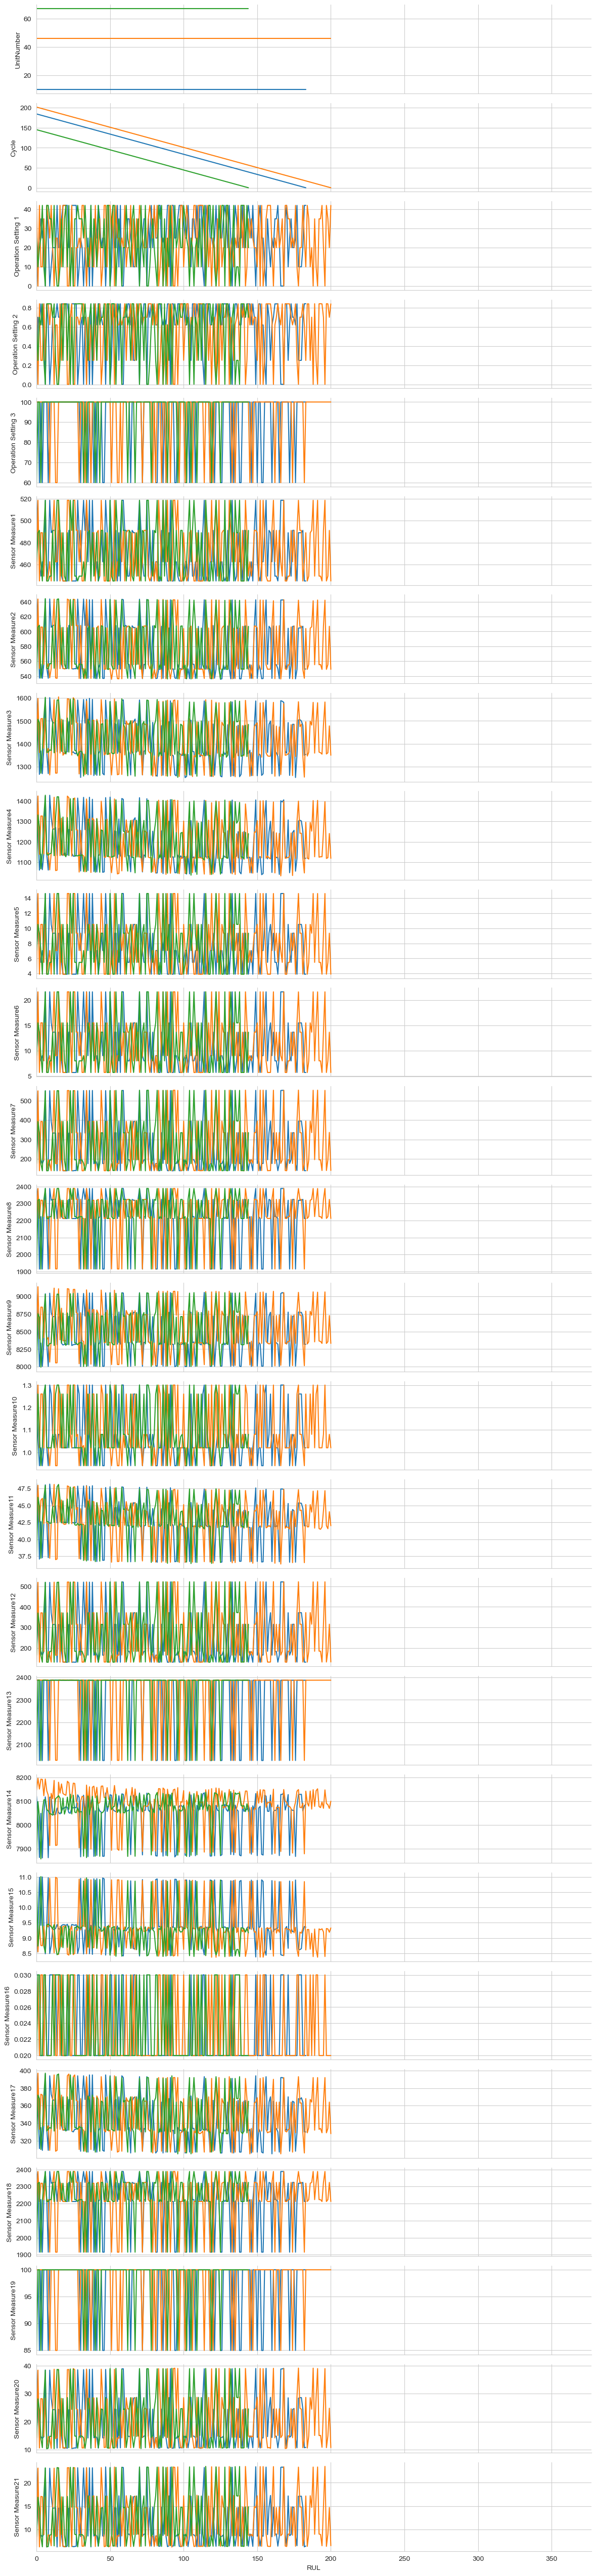

In [220]:
# Plot random 3 motors.
random_motor_ids = pd.Series(unit).sample(n=3, random_state=42).tolist()
filtered_data = train_data[train_data['UnitNumber'].isin(random_motor_ids)]
g = sns.PairGrid(data=filtered_data, x_vars='RUL', y_vars=columns, hue="UnitNumber", height=2, aspect=6,)
g = g.map(plt.plot)
g = g.set(xlim=(train_data['RUL'].min(), train_data['RUL'].max()))

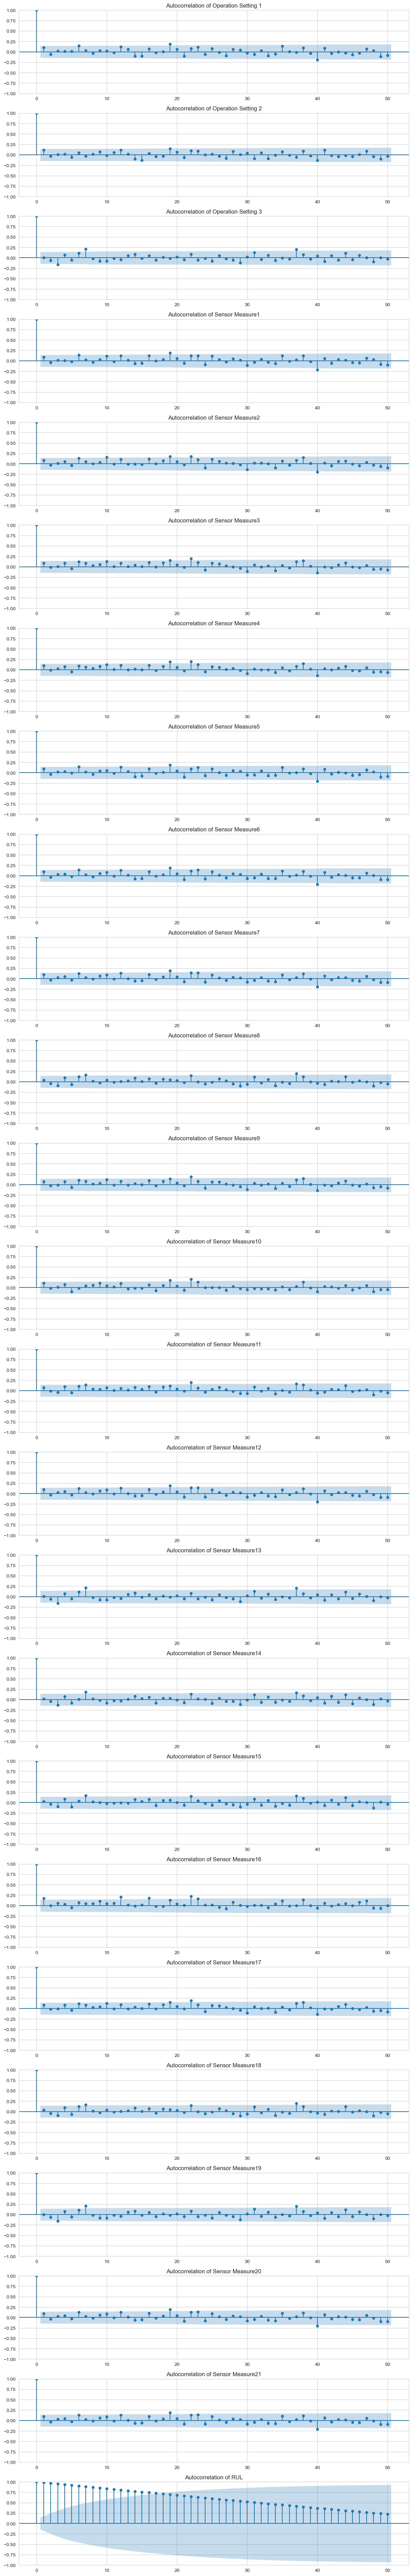

In [221]:
motor_id = 10  # Example unit_id, change as needed
unit_data = train_data[train_data['UnitNumber'] == motor_id].set_index('Cycle')
unit_data = unit_data.drop(['UnitNumber'], axis=1)

# Create subplots for autocorrelation plots
num_data = len(unit_data.columns)
fig, axes = plt.subplots(nrows=num_data, ncols=1, figsize=(12, num_data * 3))

# Compute and plot autocorrelation for each sensor column
for ax, feature in zip(axes, unit_data.columns):
    ts = unit_data[feature]
    
    # Plot the autocorrelation function (ACF)
    sm.graphics.tsa.plot_acf(ts.dropna(), lags=50, ax=ax)
    ax.set_title(f'Autocorrelation of {feature}')

plt.tight_layout()
plt.show()